In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ensembles import RandomForestMSE
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

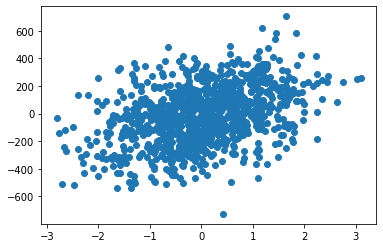

In [3]:
X, y = make_regression(n_samples=1000, n_features=12, n_informative=10, noise=1, random_state=239)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=239, shuffle=True)
plt.scatter(X[:, 2], y)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=239, shuffle=True)

In [5]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mean_squared_error(y_test, y_pred)**0.5

0.9867754923626373

In [6]:
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mean_squared_error(y_test, y_pred)**0.5

168.76474387877008

In [7]:
clf = RandomForestMSE(n_estimators=1500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mean_squared_error(y_test, y_pred)**0.5

167.9369290377807

In [8]:
clf = RandomForestRegressor(n_estimators=500, max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mean_squared_error(y_test, y_pred)**0.5

143.69194840860678

In [9]:
def compute_biase_variance(regressor, X, y, num_runs=100):
    """
    :param regressor: sklearn estimator with fit(...) and predict(...) method
    :param X: numpy-array representing training set ob objects, shape [n_obj, n_feat]
    :param y: numpy-array representing target for training objects, shape [n_obj]
    :param num_runs: int, number of samples (s in the description of the algorithm)
    
    :returns: bias (float), variance (float), error (float) 
    each value is computed using bootstrap
    """

    y_pred = np.zeros((num_runs, y.shape[0]))

    for i in range(num_runs):
        idx = np.random.randint(0, X.shape[0], X.shape[0])
        idx_j = ~(np.isin(X, X[idx])[:, 0].reshape(-1))

        regressor.fit(X[idx], y[idx])
        y_pred_i = regressor.predict(X[idx_j])
        
        y_pred[i, idx_j] = y_pred_i


    sum_y_pred = y_pred.sum(axis=0)
    sum_y_pred_count = (y_pred != 0).astype(int).sum(axis=0)
    mean_y_pred = sum_y_pred[sum_y_pred != 0] / sum_y_pred_count[sum_y_pred_count != 0]
    
    bias = np.mean((mean_y_pred - y)**2)
    variance = np.mean(np.mean((y_pred[y_pred != 0] - (np.ones_like(y_pred) * mean_y_pred)[y_pred != 0])**2, axis=0))
    error = np.mean(np.mean((y_pred[y_pred != 0] - (np.ones_like(y_pred) * y)[y_pred != 0])**2, axis=0))

    return bias, variance, error

In [10]:
compute_biase_variance(DecisionTreeRegressor(), X, y)

(9039.12489518585, 18645.11768175831, 27632.439596098393)

In [130]:
bias, variance, error = compute_biase_variance(DecisionTreeRegressor(), X, y)
print(f'DecisionTreeRegressor:\nbias: {bias}, variance: {variance}, error: {error}\n')

bias, variance, error = compute_biase_variance(RandomForestMSE(max_depth=4), X, y)
print(f'RandomForestMSE:\nbias: {bias}, variance: {variance}, error: {error}\n')

bias, variance, error = compute_biase_variance(RandomForestRegressor(max_depth=4), X, y)
print(f'RandomForestRegressor:\nbias: {bias}, variance: {variance}, error: {error}\n')

DecisionTreeRegressor:
bias: 9168.228744115095, variance: 18817.288138967062, error: 27989.138767125958

RandomForestMSE:
bias: 22466.914818447713, variance: 16.457194982679923, error: 22481.371714348326

RandomForestRegressor:
bias: 17403.615510639138, variance: 1684.2333231207542, error: 18875.344112422234

